# Impact of the geometry on HPL performance

In [1]:
import io
import zipfile
import os
import pandas
from plotnine import *
import plotnine
plotnine.options.figure_size = (12, 8)
import yaml
import warnings
warnings.simplefilter(action='ignore') # removing annoying Pandas warning

def get_yaml(archive_name, yaml_name):
    archive = zipfile.ZipFile(archive_name)
    return yaml.load(io.BytesIO(archive.read(yaml_name)))

def get_platform(archive_name):
    info = get_yaml(archive_name, 'info.yaml')
    expfiles = info['expfile']
    platform = [f for f in expfiles if f.endswith('xml')]
    assert len(platform) == 1
    return platform[0]

def read_result(name):
    archive = zipfile.ZipFile(name)
    return pandas.read_csv(io.BytesIO(archive.read('results.csv')))

archive = 'geometry/1/nancy_2020-06-12_2597114.zip'

df = read_result(archive)
df['geometry'] = df['proc_p'].astype(str) + '×' + df['proc_q'].astype(str)
df.head()

,matrix_size,block_size,proc_p,proc_q,pfact,rfact,bcast,depth,swap,mem_align,process_per_node,thread_per_process,time,gflops,residual,start_timestamp,stop_timestamp,geometry
0,100000,512,4,15,1,2,2,1,0,8,1,18,59.56,11190.0,1.415238e+08,2020-06-12 10:52:12.407772,2020-06-12 10:53:21.679677,4×15
1,200000,512,2,30,1,2,2,1,0,8,1,18,387.61,13760.0,2.137517e+07,2020-06-12 10:53:23.152772,2020-06-12 11:00:30.194489,2×30
2,200000,512,5,12,1,2,2,1,0,8,1,18,326.83,16320.0,2.106482e+07,2020-06-12 11:00:32.192679,2020-06-12 11:06:37.892866,5×12
3,100000,512,3,20,1,2,2,1,0,8,1,18,69.77,9555.0,1.397328e+08,2020-06-12 11:06:39.372043,2020-06-12 11:07:59.509228,3×20
4,100000,512,6,10,1,2,2,1,0,8,1,18,62.08,10740.0,8.769862e+07,2020-06-12 11:08:00.978082,2020-06-12 11:09:13.418745,6×10


### Checking the parameters

In [2]:
name_exceptions = {'application_time', 'simulation_time', 'usr_time', 'sys_time', 'time', 'gflops', 'residual', 'cpu_utilization',
                   'dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept',
                   'stochastic_cpu', 'polynomial_dgemm', 'stochastic_network', 'heterogeneous_dgemm', 'platform', 'model', 'filename',
                   'simulation', 'slow_nodes',
                   'major_page_fault', 'minor_page_fault', 'matrix_size', 'mode',
                   'start_timestamp', 'stop_timestamp'}
colnames = set(df) - name_exceptions
df[list(colnames)].drop_duplicates()

,pfact,thread_per_process,proc_q,block_size,depth,mem_align,swap,bcast,rfact,proc_p,process_per_node,geometry
0,1,18,15,512,1,8,0,2,2,4,1,4×15
1,1,18,30,512,1,8,0,2,2,2,1,2×30
2,1,18,12,512,1,8,0,2,2,5,1,5×12
3,1,18,20,512,1,8,0,2,2,3,1,3×20
4,1,18,10,512,1,8,0,2,2,6,1,6×10


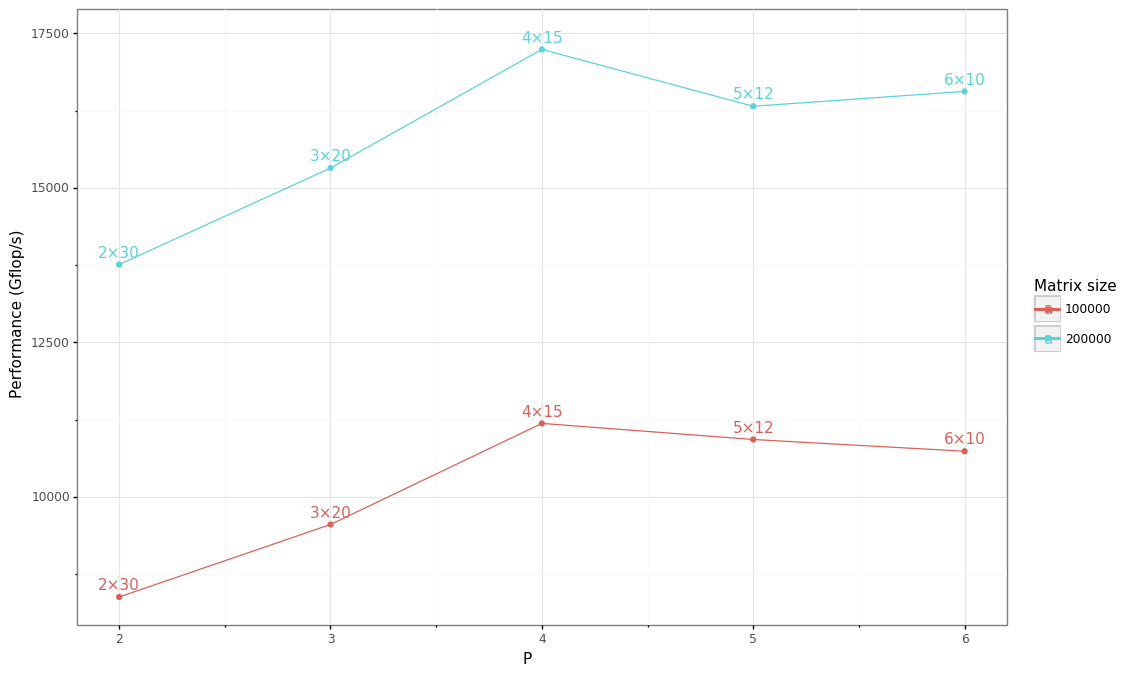

<ggplot: (-9223363262794087950)>

In [3]:
(ggplot(df)
    + aes(x='proc_p', y='gflops', color='factor(matrix_size)')
    + geom_point()
    + geom_text(aes(label='geometry'), position=position_nudge(y=200))
    + geom_line()
    + theme_bw()
    + labs(x='P', y='Performance (Gflop/s)', color='Matrix size')
)